In [1]:
#必要なライブラリ
import keras
from keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import glob

In [2]:
#パラメーター
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
INPUT_SHAPE= (224, 224, 3)

In [3]:
#肌評価のネットワーク
densenet = tf.keras.applications.DenseNet169(
    include_top = False, 
    weights = "imagenet",
    input_shape = INPUT_SHAPE
    )

x = GlobalAveragePooling2D()(densenet.output)
x = Dense(units = 256, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(units = 128, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = Dense(units = 64, activation = 'relu')(x)
pred = Dense(units = 7, activation = 'softmax', kernel_regularizer = l2(l = 0.01))(x)
model = keras.models.Model(inputs = densenet.input, outputs = pred)
model.load_weights('./densenet_skin_finetuned_best.h5')

x = model.layers[-8].output
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(7, activation='relu')(x)
model = keras.models.Model(inputs = model.input, outputs = output)
model.load_weights('./cp-0022.h5')

In [4]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','accuracy'])

In [5]:
#画像を評価してみる
img = image.load_img("2000.jpg",target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
actual_score = [3, 3, 3, 4, 3, 3, 4]

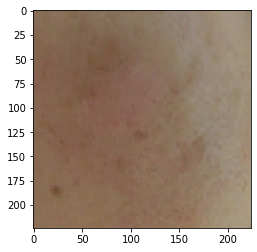

In [6]:
#評価してみる画像
plt.imshow(img)

In [7]:
#評価結果
print("評価項目 ： Texture, Pores, Spot, Saggy, Clear, Melanin, Wrinkles")
print("AIの評価 : {0}".format(model.predict(img.reshape(1,224,224,3))[0]))
print("皮膚科の先生の評価 ：{0}".format(actual_score))

評価項目 ： Texture, Pores, Spot, Saggy, Clear, Melanin, Wrinkles
AIの評価 : [2.5836005 1.9929305 2.8162045 2.5189328 2.1967537 2.4324436 2.5420213]
皮膚科の先生の評価 ：[3, 3, 3, 4, 3, 3, 4]
